<h1 style="color: red; text-align: center;"> TRABAJO FINAL </h1>
<h2 style="color: red; text-align: center;"> Por: Guillermo De Mendoza </h2>
<h5 style="color: red; text-align: center;"> Materia: metodos de analisis de datos </h5>
<h5 style="color: red; text-align: center;"> Maestria en Matematicas Aplicadas - Universidad Sergio Arboleda </h5>

<br>

<b>Indice de contenidos:</b>

1. Cargar datos
2. Visualizar datos
3. Analizar datos
4. Preprosesamiento de datos
5. Segmentacion Kmeans
6. K Vecinos
7. Predicciones

# Importar librerias

In [1]:
# datos
import pandas as pd 

# operaciones
import numpy as np
from scipy.spatial.distance import cdist

# graficas
import matplotlib.pyplot as plt
import seaborn as sns

# sistema
import os

# machine learning
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix,accuracy_score)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


# 1. Cargar datos

In [2]:
data = pd.read_csv(r'C:\Users\Gmendoza\Desktop\ANALISIS DE DATOS\Winequality.csv',sep=';')

# 2. Visualizar datos

In [3]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.shape

(1599, 12)

# 3. Analizar datos

In [5]:
# metodos graficos
def obtainListForPlotting(xValues,yValues,filter_value):   
    values = {}
    for i in range(len(xValues)):
        if yValues[i] == filter_value:
            if xValues[i] in values:
                pass
            else:
                values[xValues[i]] = 1
    keys = []
    for k in values.keys():
        keys.append(k)
    keys.sort()
    x = []
    y = []
    for e in keys:
        x.append(e)
        y.append(values[e])
    return x,y

### Quality

In [6]:
quality_range = data["quality"].unique()
quality_range

array([5, 6, 7, 4, 8, 3], dtype=int64)

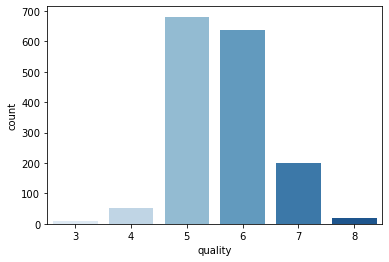

In [7]:
sns.countplot(x='quality',data=data,palette='Blues')

### fixed acidity

Los promedios de valores de ''fixed acidity son similares entre los valides de calidad del vino

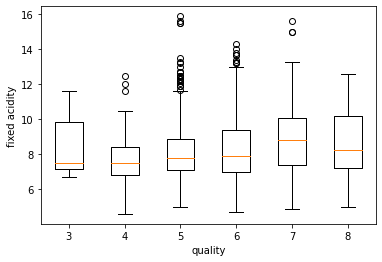

In [8]:
label_selected_name = 'fixed acidity'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### volatile acidity

Entre menor calidad, el vino tiene mas 'volatile acidity'

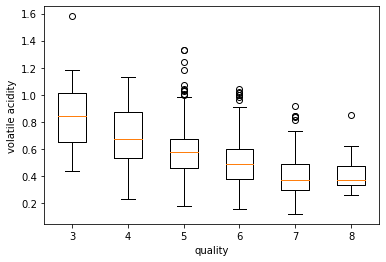

In [9]:
label_selected_name = 'volatile acidity'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### citric acid

Entre mas calidad, el vino tiene mayor concentracion de 'citric acid'

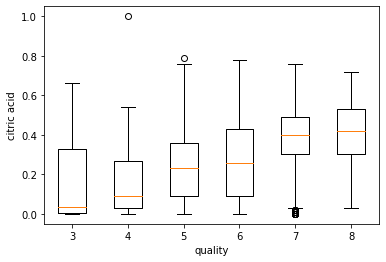

In [10]:
label_selected_name = 'citric acid'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### residual sugar

Los promedios de valores de 'residual sugar' son similares entre los valides de calidad del vino

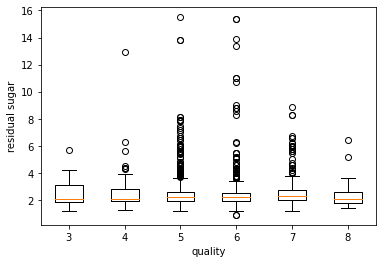

In [11]:
label_selected_name = 'residual sugar'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### chlorides

Los promedios de valores de 'chlorides' son similares entre los valides de calidad del vino, con un ligero incremento en los de baja calidad (3)

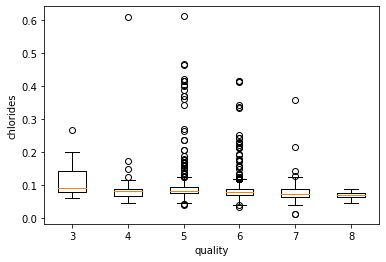

In [12]:
label_selected_name = 'chlorides'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### free sulfur dioxide

Para los vinos de calidad media (5,6) se nota un ligero incremento en el valor de 'free sulfur dioxide'

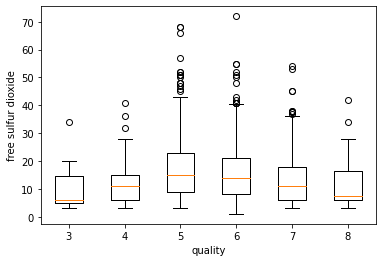

In [13]:
label_selected_name = 'free sulfur dioxide'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### total sulfur dioxide

Para los vinos de calidad media (5,6) se nota un ligero incremento en el valor de 'total sulfur dioxide'

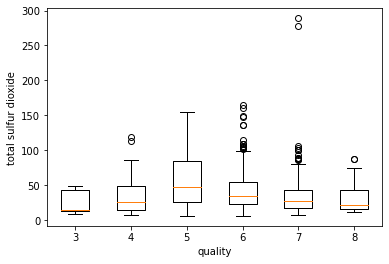

In [14]:
label_selected_name = 'total sulfur dioxide'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### density

Los promedios de valores de 'density' son similares entre los valides de calidad del vino

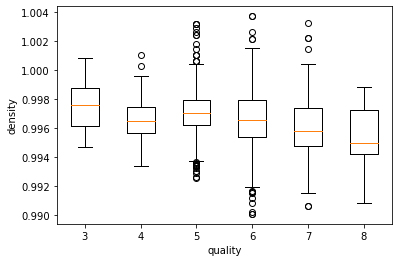

In [15]:
label_selected_name = 'density'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### pH

Los promedios de valores de 'pH' son similares entre los valides de calidad del vino

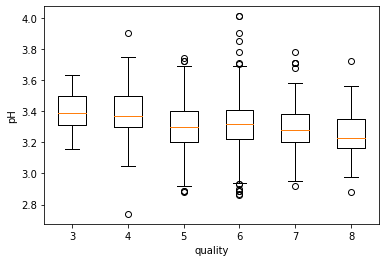

In [16]:
label_selected_name = 'pH'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### sulphates	

Entre mas calidad del vino se evidencia un valor superior de 'sulphates'

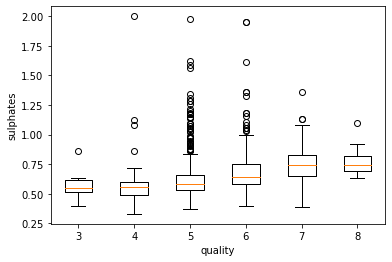

In [17]:
label_selected_name = 'sulphates'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

### alcohol

Entre mas calidad del vino se evidencia un valor superior de 'alcohol'

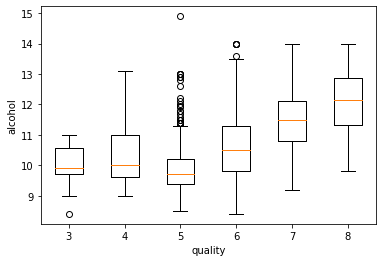

In [18]:
label_selected_name = 'alcohol'
label_quality_name = 'quality'
d3 = data[data[label_quality_name]==3][label_selected_name].tolist()
d4 = data[data[label_quality_name]==4][label_selected_name].tolist()
d5 = data[data[label_quality_name]==5][label_selected_name].tolist()
d6 = data[data[label_quality_name]==6][label_selected_name].tolist()
d7 = data[data[label_quality_name]==7][label_selected_name].tolist()
d8 = data[data[label_quality_name]==8][label_selected_name].tolist()

plt.xlabel(label_quality_name)
plt.ylabel(label_selected_name)
plt.boxplot([d3,d4,d5,d6,d7,d8], positions=[3,4,5,6,7,8])
plt.show()

# 4. Preprosesamiento de datos

### Dividir datos en 'X' & 'y'

In [19]:
X = data.loc[:,data.columns != 'quality']
y = data.loc[:,data.columns == 'quality']

### comprobar valores nulos

In [20]:
data.isnull().values.any()

False

# 5. Segmentacion Kmeans

### Segmentar con Kmeans

In [21]:
K = range(1,20)

executions = []
distortions = []
inertias = []

for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(X)
    executions.append(kmeanModel)
    
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1)/X.shape[0]))
    inertias.append(kmeanModel.inertia_)


### Metodo del codo (Elbow method)

Se puede evidenciar en el grafico que la segmentacion en 6 grupos resulta favorable, aunque segun el grafico de varianzas, el punto que contiene el cambio de concavidad (Punto de inflexion) resulta ser 7, el cual seria el optimo para segmentar los datos

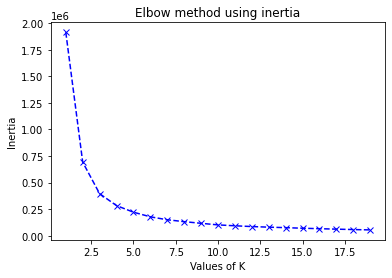

In [22]:
plt.plot(K,inertias,'bx--')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow method using inertia')
plt.show()

# 6. K Vecinos

In [23]:
print(X.shape)
print(y.shape)

(1599, 11)
(1599, 1)


In [24]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)

<ipython-input-24-95aaf001071a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X, y)


KNeighborsClassifier(n_neighbors=1)

# 7. Predicciones

### ingresar nuevos datos (Vinos)

In [25]:
segmentos = 6

nuevo_dato_low = {
    'fixed acidity': [5.7],
    'volatile acidity': [1.13],
    'citric acid': [0.09],
    'residual sugar': [1.5],
    'chlorides': [0.172],
    'free sulfur dioxide': [7.0],
    'total sulfur dioxide': [19.0],
    'density': [0.9940],
    'pH': [3.5],
    'sulphates': [0.48],
    'alcohol': [9.8]
}

nuevo_dato_mid = {
    'fixed acidity': [7.4],
    'volatile acidity': [0.70],
    'citric acid': [0.00],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.1],
    'sulphates': [1.56],
    'alcohol': [12.4]
}

nuevo_dato_high = {
    'fixed acidity': [8.5],
    'volatile acidity': [0.28],
    'citric acid': [0.56],
    'residual sugar': [1.8],
    'chlorides': [0.092],
    'free sulfur dioxide': [35.0],
    'total sulfur dioxide': [103.0],
    'density': [0.9968],
    'pH': [3.3],
    'sulphates': [0.75],
    'alcohol': [10.5]
}

df_low = pd.DataFrame(nuevo_dato_low)
df_mid = pd.DataFrame(nuevo_dato_mid)
df_high = pd.DataFrame(nuevo_dato_high)

### predecir la calidad del nuevo dato (Vino)

Segun la informacion ingresada, el modelo predice que se le asigna una calidad:
Dato 1: 4
Dato 2: 6
Dato 3: 7


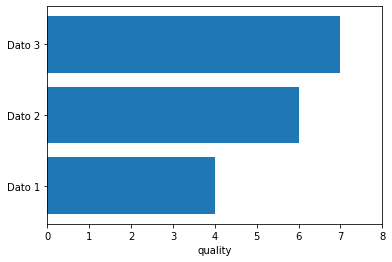

In [26]:
def predict_value(i_df):
    
    to_predict = i_df.iloc[0]

    prediction = neigh.predict([[
        to_predict['fixed acidity'],
        to_predict['volatile acidity'],
        to_predict['citric acid'],
        to_predict['residual sugar'],
        to_predict['chlorides'],
        to_predict['free sulfur dioxide'],
        to_predict['total sulfur dioxide'],
        to_predict['density'],
        to_predict['pH'],
        to_predict['sulphates'],
        to_predict['alcohol'],
    ]])
    
    return prediction[0]

p1 = predict_value(df_low)
p2 = predict_value(df_mid)
p3 = predict_value(df_high)


print("Segun la informacion ingresada, el modelo predice que se le asigna una calidad:")
print("Dato 1: %d"%(p1))
print("Dato 2: %d"%(p2))
print("Dato 3: %d"%(p3))

# graficar el nivel de la calidad del dato ingresado
labels = ['Dato 1','Dato 2', 'Dato 3']
values = [p1,p2,p3]
plt.barh(labels, values)
plt.xlabel('quality')
plt.xlim(0,8)
plt.show()